In [2]:
import pandas as pd

In [6]:
df=pd.read_csv('D:/SIFAI/Crop_recommendation.csv')

In [7]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
df['label']=le.fit_transform(df['label'])

In [11]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [12]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [15]:
df.duplicated().value_counts()

False    2200
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   int32  
dtypes: float64(4), int32(1), int64(3)
memory usage: 129.0 KB


In [18]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,10.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,5.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,10.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,16.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,21.000000


In [20]:
from pycaret.classification import *

In [21]:
s=setup(df,target='label')

,Description,Value
0,Session id,408
1,Target,label
2,Target type,Multiclass
3,Original data shape,"(2200, 8)"
4,Transformed data shape,"(2200, 8)"
5,Transformed train set shape,"(1540, 8)"
6,Transformed test set shape,"(660, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


C:\Users\shaik\anaconda3\lib\site-packages\pycaret\internal\metrics.py:51: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


In [22]:
best_model=s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9955,1.0000,0.9955,0.9960,0.9954,0.9952,0.9953,0.4140
nb,Naive Bayes,0.9948,1.0000,0.9948,0.9954,0.9948,0.9946,0.9946,0.0650
rf,Random Forest Classifier,0.9948,1.0000,0.9948,0.9956,0.9948,0.9946,0.9946,0.5400
qda,Quadratic Discriminant Analysis,0.9929,0.9999,0.9929,0.9937,0.9928,0.9925,0.9926,0.0650
lightgbm,Light Gradient Boosting Machine,0.9883,0.9999,0.9883,0.9897,0.9884,0.9878,0.9878,8.9960
gbc,Gradient Boosting Classifier,0.9851,0.9998,0.9851,0.9874,0.9850,0.9844,0.9845,11.4420
dt,Decision Tree Classifier,0.9825,0.9908,0.9825,0.9842,0.9823,0.9816,0.9817,0.0690
knn,K Neighbors Classifier,0.9805,0.9981,0.9805,0.9839,0.9804,0.9796,0.9798,0.6730
lr,Logistic Regression,0.9695,0.9996,0.9695,0.9724,0.9692,0.9680,0.9682,0.7210
lda,Linear Discriminant Analysis,0.9604,0.9996,0.9604,0.9671,0.9597,0.9585,0.9589,0.0670


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [23]:
s.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

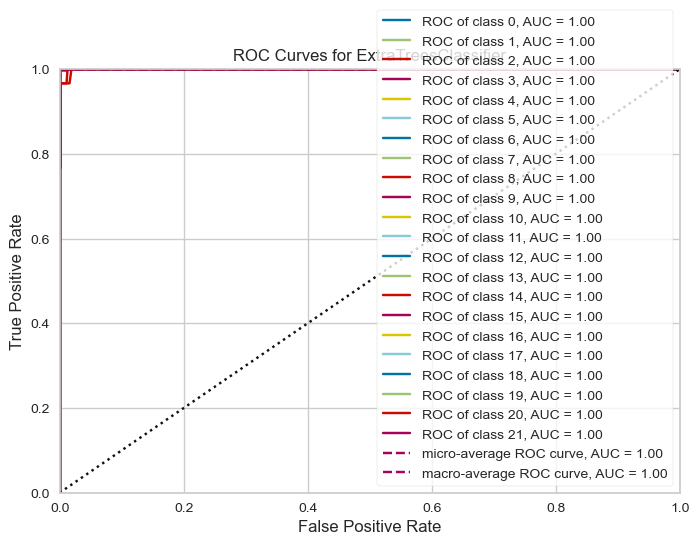

In [24]:
s.plot_model(best_model,plot='auc')

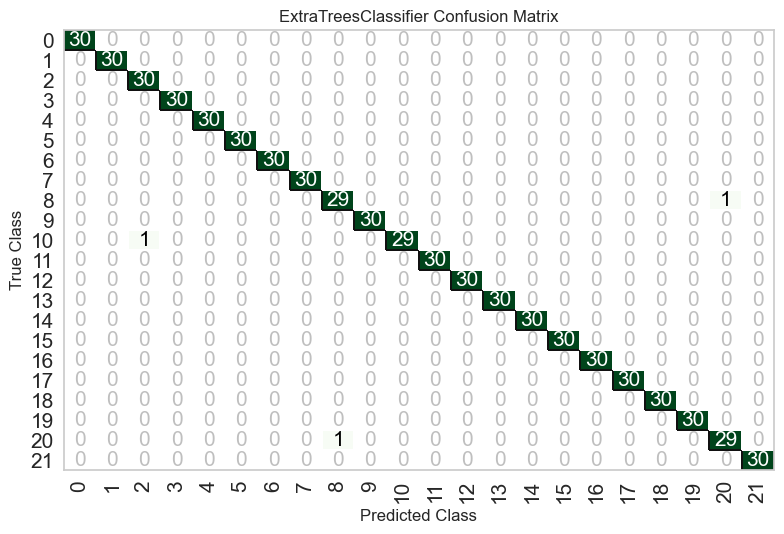

In [28]:
s.plot_model(best_model,plot='confusion_matrix')

In [29]:
s.predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9955,0.9999,0.9955,0.9955,0.9955,0.9952,0.9952


,N,P,K,temperature,humidity,ph,rainfall,label,prediction_label,prediction_score
1641,0,23,15,22.566641,93.374886,7.598729,109.858574,16,16,1.00
543,37,57,20,31.100624,44.820690,7.354287,70.799347,13,13,0.75
1433,107,11,54,28.590523,91.336174,6.094017,29.440081,15,15,0.96
2041,80,52,39,26.419151,76.856911,7.165697,197.210175,8,8,0.78
560,22,55,24,28.568007,57.306358,8.660780,64.530273,13,13,0.77
...,...,...,...,...,...,...,...,...,...,...
1897,23,21,26,26.454887,93.450424,5.901495,149.222031,4,4,0.99
2050,75,56,44,25.274633,73.745956,6.109478,168.043228,8,8,0.79
1177,40,16,35,31.893562,49.024502,6.484152,89.593712,12,12,0.90
792,29,63,17,30.026299,67.888115,7.261543,66.472649,2,2,0.87


In [30]:
predictions = s.predict_model(best_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9986,1.0000,0.9986,0.9986,0.9986,0.9986,0.9986


In [31]:
predictions.head()

,N,P,K,temperature,humidity,ph,rainfall,label,prediction_label,prediction_score
0,90,42,43,20.879744,82.002747,6.502985,202.935532,20,20,0.74
1,85,58,41,21.770462,80.319641,7.038096,226.655533,20,20,1.00
2,60,55,44,23.004459,82.320763,7.840207,263.964233,20,20,1.00
3,74,35,40,26.491096,80.158363,6.980401,242.864029,20,20,1.00
4,78,42,42,20.130175,81.604874,7.628473,262.717346,20,20,0.97


In [32]:
s.save_model(best_model, 'seedai_cyp')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['N', 'P', 'K', 'temperature',
                                              'humidity', 'ph', 'rainfall'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=Non...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, c

In [49]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [55]:
import requests

def get_crop_yield_prediction(N, P, K, temperature, humidity, ph, rainfall):
    # Define the input data
    input_data = {
        "N": N,
        "P": P,
        "K": K,
        "temperature": temperature,
        "humidity": humidity,
        "ph": ph,
        "rainfall": rainfall
    }

    # Send a POST request to the API endpoint with query parameters
    response = requests.post("http://localhost:8000/predict", params=input_data)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Extract the prediction from the response
        prediction = response.json()["prediction"]
        return prediction
    else:
        print("Error:", response.text)
        return None

# Example usage:
N = 90
P = 42
K = 43
temperature = 20.87974371
humidity = 82.00274423
ph = 6.502985292
rainfall = 202.9355362

predicted_yield = get_crop_yield_prediction(N, P, K, temperature, humidity, ph, rainfall)
print("Predicted crop yield:", predicted_yield)


Predicted crop yield: 20.0
